In [ ]:
from flask import Flask, jsonify, render_template
import pandas as pd

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, defer
from sqlalchemy import create_engine, func

import numpy as np
from matplotlib import pyplot as plt

# DATABASE SETUP

# create engine 
engine = create_engine("sqlite:///music.db")
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine)

# save references to each table
songs = Base.classes.topmusic

# FLASK SETUP

# Create an app, being sure to pass __name__


   
# Create a session
session = Session(engine)
# Query the database
results = session.query(
    songs.trackname,
    songs.artistname,
    songs.country,
    songs.albumname,
    songs.danceability,
    songs.duration,
    songs.energy,
    songs.instrumentalness,
    songs.liveness,
    songs.loudness,
    songs.tempo,
    songs.positiveness
)
# Convert the query result into a list of dictionaries
result_list = []
for row in results:
    result_dict = {
        "trackname": row[0],
        "artistname": row[1],
        "country": row[2],
        "albumname": row[3],
        "danceability": row[4],
        "duration": row[5],
        "energy": row[6],
        "instrumentalness": row[7],
        "liveness": row[8],
        "loudness": row[9],
        "tempo": row[10],
        "positiveness": row[11]
    }
    result_list.append(result_dict)
# Close the session
session.close()
# jsonify the result_list and return it as a JSON response


df = pd.DataFrame(result_list)
df.groupby(['country','artistname']).mean(numeric_only=True).reset_index()  

In [10]:
df

,trackname,artistname,country,albumname,danceability,duration,energy,instrumentalness,liveness,loudness,tempo,positiveness
0,Standing Next to You,Jung Kook,Global,GOLDEN,0.711,206020,0.809,0.000000,0.3390,-4.389,106.017,0.816
1,greedy,Tate McRae,Global,greedy,0.750,131872,0.733,0.000000,0.1140,-3.180,111.018,0.844
2,Seven (feat. Latto) (Explicit Ver.),Jung Kook,Global,GOLDEN,0.790,183551,0.831,0.000000,0.0797,-4.185,124.987,0.872
3,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,Global,1989 (Taylor's Version),0.596,229478,0.658,0.000000,0.1270,-7.346,100.012,0.176
4,PERRO NEGRO,Bad Bunny,Global,nadie sabe lo que va a pasar mañana,0.911,162768,0.778,0.000022,0.1790,-2.248,96.057,0.345
...,...,...,...,...,...,...,...,...,...,...,...,...
2857,An Thần,Low G,VNM,An Thần,0.758,174286,0.773,0.000002,0.1140,-7.266,169.996,0.907
2858,Tell the kids i love them (ft. Shiki),Obito,VNM,Đánh Đổi,0.678,224176,0.482,0.000000,0.2980,-14.073,90.962,0.459
2859,Too Sad to Dance,Jung Kook,VNM,GOLDEN,0.558,175912,0.467,0.000000,0.1050,-6.292,100.518,0.563
2860,You & Me,JENNIE,VNM,JENNIE Special Single [You & Me],0.787,179164,0.573,0.000017,0.0926,-6.197,111.996,0.575


<Axes: xlabel='danceability', ylabel='positiveness'>

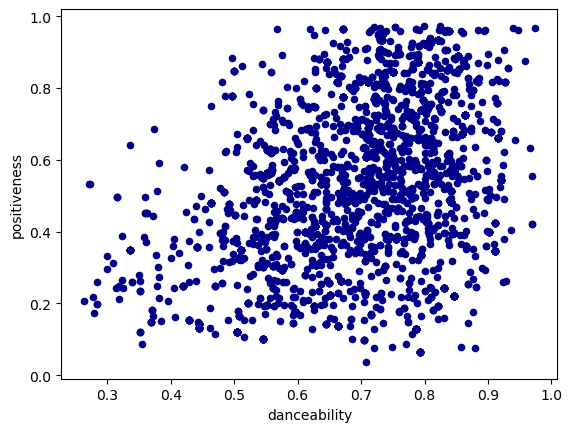

In [11]:
df.plot.scatter(x='danceability', y='positiveness', c='DarkBlue')